In [183]:
import mag
from mag import summarize
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

np.set_printoptions(precision=3)

In [190]:
%matplotlib inline

In [199]:
arr = np.arange(9).reshape((3,3))
print(arr)

arr[[0, 1], [0, 1]]

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([0, 4])

# Result Accuracies


Results for /mnt/pccfs/backed_up/jaredtn/research/semi_supervised/experiments_cifar_v4:



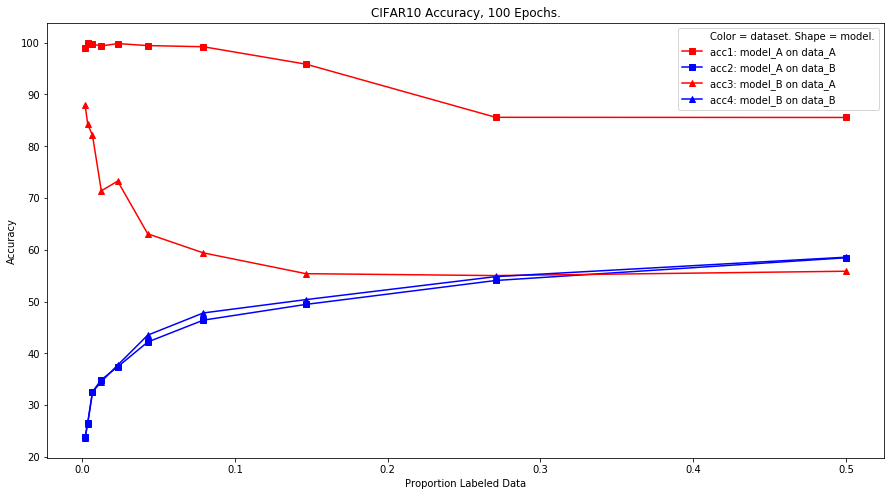

In [156]:
experiments_dir = './experiments_cifar_v4'
fig_name = 'plots/cifar10_10epochs.png'
fig_name_log = 'plots/acc_pct_10epoch_log.png'
fig_name = None
fig_hame = None

results = dict(summarize.collect_results(experiments_dir, metrics=["acc1", "acc2",
                                                                  "acc3", "acc4"]))
# print(results)

n_epochs = results['experiment'][0].split('|')[0]
experiments = [float(i.split('|')[1]) for i in results['experiment']]
acc1, acc2, acc3, acc4 = (results['acc1'], results['acc2'], 
                          results['acc3'], results['acc4'])
experiments, acc1, acc2, acc3, acc4 = zip(*sorted(zip(experiments, acc1, acc2, acc3, acc4)))
                          
                          
def plot_results(figname=None, log=False, title=None):
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    ax.plot([], [], ' ', label="Color = dataset. Shape = model.")
    ax.plot(experiments, acc1, label="acc1: model_A on data_A", color='red', marker='s')
    ax.plot(experiments, acc2, label="acc2: model_A on data_B", color='blue', marker='s')
    ax.plot(experiments, acc3, label="acc3: model_B on data_A", color='red', marker='^')
    ax.plot(experiments, acc4, label="acc4: model_B on data_B", color='blue', marker='^')
    if log:
        ax.set_xscale("log")
    ax.set_xlabel("Proportion Labeled Data")
    ax.set_ylabel("Accuracy")
    ax.set_title(title)
    ax.legend()
    if figname is not None:
        fig.savefig(figname)
    plt.show()            

plot_results(fig_name, log=False, title="CIFAR10 Accuracy, {} Epochs.".format(n_epochs))
# plot_results(fig_name_log, log=True)

# Result Accuracies Animation


Results for /mnt/pccfs/backed_up/jaredtn/research/semi_supervised/experiments_cifar_v5:

0
0
1
done
0


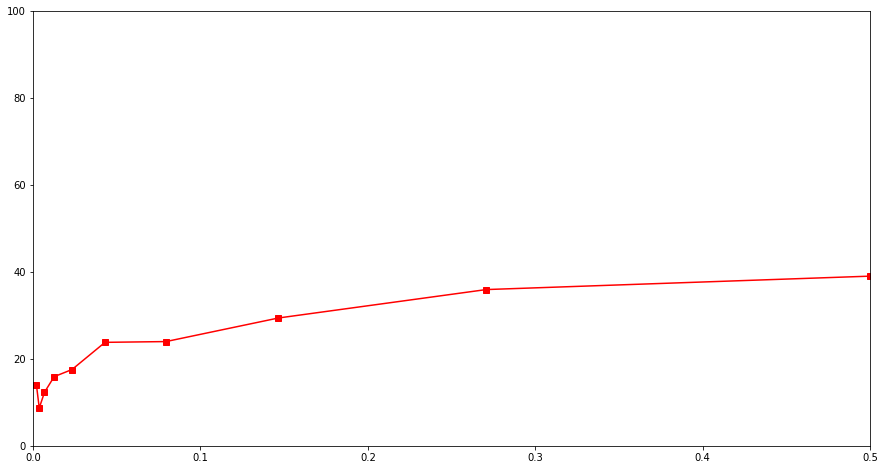

In [196]:
##### experiments_dir = './experiments_cifar_v5'
fig_name = 'plots/cifar10_10epochs.mp4'
# fig_name = None

results = dict(summarize.collect_results(experiments_dir, metrics=["acc1s", "acc2s",
                                                                   "acc3s", "acc4s"]))
# print(results)

n_epochs = int(results['experiment'][0].split('|')[0])
experiments = np.array([float(i.split('|')[1]) for i in results['experiment']])
isort = np.argsort(experiments)
acc1s, acc2s, acc3s, acc4s = (
    np.array(results[name])[isort] for name in ['acc1s', 'acc2s', 'acc3s', 'acc4s']
)

experiments = experiments[isort]
acc1


fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.set_xlim([0, 0.5])
ax.set_ylim([0, 100])
func1, = ax.plot([], [], label="acc1: model_A on data_A", color='red', marker='s')
func2, = ax.plot([], [], label="acc2: model_A on data_B", color='blue', marker='s')
func3, = ax.plot([], [], label="acc3: model_B on data_A", color='red', marker='^')
func4, = ax.plot([], [], label="acc4: model_B on data_B", color='blue', marker='^')

def update(i):
    func1.set_data(experiments, acc1s[:,0])
    
    print(i)
    return func

ani = animation.FuncAnimation(fig, update, frames=range(n_epochs), interval=25)
mywriter = animation.FFMpegWriter()

ani.save(fig_name, writer=mywriter)
print("done")

<video src="cifar10_10epochs.mp4" controls>

In [ ]:
x = np.linspace